Note: you may need to restart the kernel to use updated packages.


## 1. Perform any preparation of the data (for both the Neural Network and Semantic Analysis data), that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you.[0-30]

In [1]:
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasRegressor

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# load the dataset 
dataset = pd.read_csv('BankRecords.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [4]:
dataset.describe()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


In [5]:
dataset.notnull()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4996,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4997,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4998,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [6]:
df = dataset.drop(columns=['ID', 'Sort Code', 'CD Account'])
df

,Age,Experience(Years),Income(Thousands's),Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,Online Banking,CreditCard
0,25,1,49,4,1.6,Diploma,0,No,Yes,No,No
1,45,19,34,3,1.5,Diploma,0,No,Yes,No,No
2,39,15,11,1,1.0,Diploma,0,No,No,No,No
3,35,9,100,1,2.7,Degree,0,No,No,No,No
4,35,8,45,4,1.0,Degree,0,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,Masters,0,No,No,Yes,No
4996,30,4,15,4,0.4,Diploma,85,No,No,Yes,No
4997,63,39,24,2,0.3,Masters,0,No,No,No,No
4998,65,40,49,3,0.5,Degree,0,No,No,Yes,No


In [7]:
df['Education'].unique()

array(['Diploma', 'Degree', 'Masters'], dtype=object)

In [8]:
education = ['Diploma', 'Degree', 'Masters']

# Create an OrdinalEncoder object with the specified order
encoder = OrdinalEncoder(categories=[education])
# Apply the encoding
df['Education'] = encoder.fit_transform(df[['Education']])
df

,Age,Experience(Years),Income(Thousands's),Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,Online Banking,CreditCard
0,25,1,49,4,1.6,0.0,0,No,Yes,No,No
1,45,19,34,3,1.5,0.0,0,No,Yes,No,No
2,39,15,11,1,1.0,0.0,0,No,No,No,No
3,35,9,100,1,2.7,1.0,0,No,No,No,No
4,35,8,45,4,1.0,1.0,0,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,2.0,0,No,No,Yes,No
4996,30,4,15,4,0.4,0.0,85,No,No,Yes,No
4997,63,39,24,2,0.3,2.0,0,No,No,No,No
4998,65,40,49,3,0.5,1.0,0,No,No,Yes,No


In [9]:
df.head(10)

,Age,Experience(Years),Income(Thousands's),Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,Online Banking,CreditCard
0,25,1,49,4,1.6,0.0,0,No,Yes,No,No
1,45,19,34,3,1.5,0.0,0,No,Yes,No,No
2,39,15,11,1,1.0,0.0,0,No,No,No,No
3,35,9,100,1,2.7,1.0,0,No,No,No,No
4,35,8,45,4,1.0,1.0,0,No,No,No,Yes
5,37,13,29,4,0.4,1.0,155,No,No,Yes,No
6,53,27,72,2,1.5,1.0,0,No,No,Yes,No
7,50,24,22,1,0.3,2.0,0,No,No,No,Yes
8,35,10,81,3,0.6,1.0,104,No,No,Yes,No
9,34,9,180,1,8.9,2.0,0,Yes,No,No,No


In [12]:
# One-Hot Encode the specified binary columns
one_hot_columns = ['Personal Loan', 'Securities Account', 'Online Banking', 'CreditCard']

# drop='first' to avoid multicollinearity
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first') 

# Transform the data
encoded_data = one_hot_encoder.fit_transform(df[one_hot_columns])

# Get feature names from the encoder
encoded_feature_names = one_hot_encoder.get_feature_names_out(one_hot_columns)

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)

# Drop original columns and concatenate the encoded columns
#df = df.drop(columns=one_hot_columns).reset_index(drop=True)
#df = pd.concat([df, encoded_df], axis=1)

In [13]:
encoded_df

,Personal Loan_Yes,Securities Account_Yes,Online Banking_Yes,CreditCard_Yes
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
4995,0.0,0.0,1.0,0.0
4996,0.0,0.0,1.0,0.0
4997,0.0,0.0,0.0,0.0
4998,0.0,0.0,1.0,0.0


In [14]:
# Drop original columns and concatenate the encoded columns
#df = df.drop(columns=one_hot_columns).reset_index(drop=True)
NN_dataset = pd.concat([df, encoded_df], axis=1)
NN_dataset

,Age,Experience(Years),Income(Thousands's),Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,Online Banking,CreditCard,Personal Loan_Yes,Securities Account_Yes,Online Banking_Yes,CreditCard_Yes
0,25,1,49,4,1.6,0.0,0,No,Yes,No,No,0.0,1.0,0.0,0.0
1,45,19,34,3,1.5,0.0,0,No,Yes,No,No,0.0,1.0,0.0,0.0
2,39,15,11,1,1.0,0.0,0,No,No,No,No,0.0,0.0,0.0,0.0
3,35,9,100,1,2.7,1.0,0,No,No,No,No,0.0,0.0,0.0,0.0
4,35,8,45,4,1.0,1.0,0,No,No,No,Yes,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,2.0,0,No,No,Yes,No,0.0,0.0,1.0,0.0
4996,30,4,15,4,0.4,0.0,85,No,No,Yes,No,0.0,0.0,1.0,0.0
4997,63,39,24,2,0.3,2.0,0,No,No,No,No,0.0,0.0,0.0,0.0
4998,65,40,49,3,0.5,1.0,0,No,No,Yes,No,0.0,0.0,1.0,0.0


In [15]:
neural_net = NN_dataset.drop(columns=['Personal Loan', 'Securities Account', 'Online Banking', 'CreditCard'])
neural_net

,Age,Experience(Years),Income(Thousands's),Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan_Yes,Securities Account_Yes,Online Banking_Yes,CreditCard_Yes
0,25,1,49,4,1.6,0.0,0,0.0,1.0,0.0,0.0
1,45,19,34,3,1.5,0.0,0,0.0,1.0,0.0,0.0
2,39,15,11,1,1.0,0.0,0,0.0,0.0,0.0,0.0
3,35,9,100,1,2.7,1.0,0,0.0,0.0,0.0,0.0
4,35,8,45,4,1.0,1.0,0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,2.0,0,0.0,0.0,1.0,0.0
4996,30,4,15,4,0.4,0.0,85,0.0,0.0,1.0,0.0
4997,63,39,24,2,0.3,2.0,0,0.0,0.0,0.0,0.0
4998,65,40,49,3,0.5,1.0,0,0.0,0.0,1.0,0.0


C:\Users\lsant\Downloads\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lsant\Downloads\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lsant\Downloads\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lsant\Downloads\Newfolder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

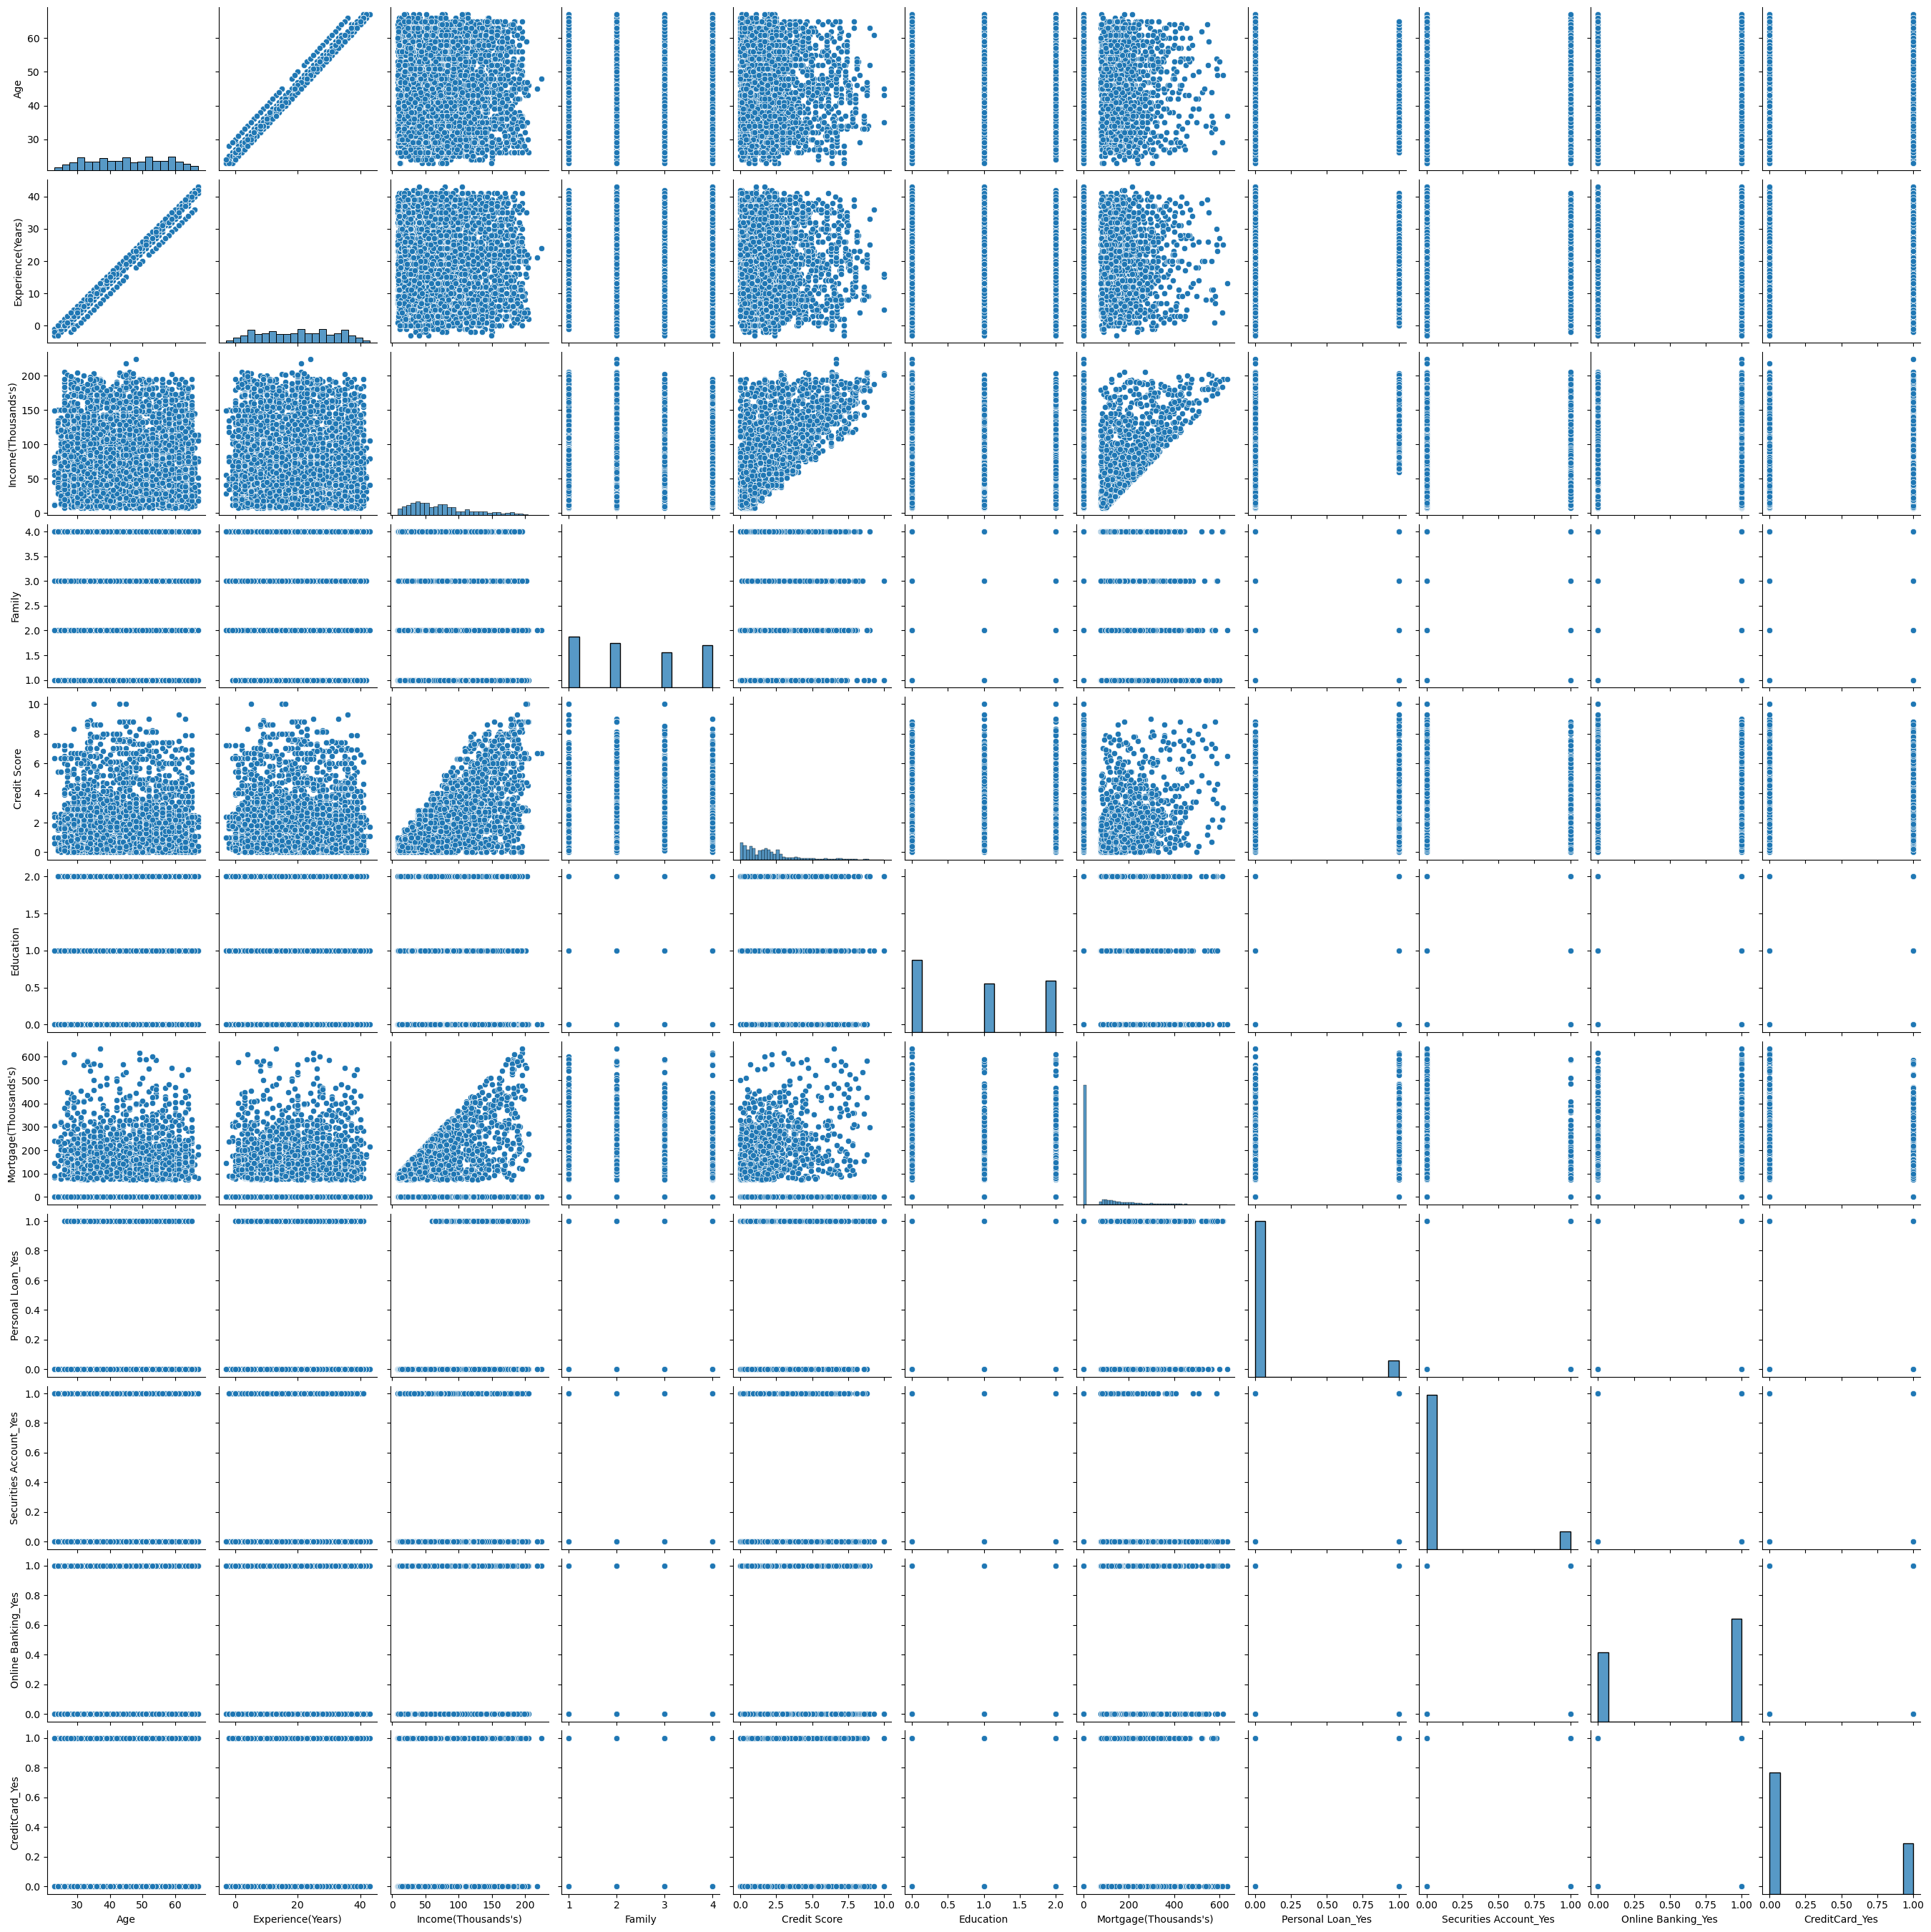

In [16]:
sns.pairplot(neural_net)

In [17]:
# Separating features and target
X = neural_net.drop(columns=["Income(Thousands's)"])
y = neural_net["Income(Thousands's)"]

In [18]:
# Creating training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [19]:
def build_regressor(): 
 regressor = Sequential() 
 regressor.add(Dense(units=10, input_dim=10)) 
 regressor.add(Dense(units=1)) 
 regressor.compile(optimizer='adam', loss='mean_squared_error', 
metrics=['mae','accuracy']) 
 return regressor 

In [22]:
regressor = KerasRegressor(build_fn=build_regressor, 
batch_size=32,epochs=100)

In [23]:
results=regressor.fit(X_train,y_train) 

C:\Users\lsant\Downloads\Newfolder\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\lsant\Downloads\Newfolder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: 7010.5762 - mae: 68.4456
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 3822.8545 - mae: 46.4269
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2529.8062 - mae: 37.9591
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2335.4980 - mae: 37.4929
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2166.4058 - mae: 36.3984
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2197.4248 - mae: 36.8920
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2131.9998 - mae: 36.7076
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1985.2858 - mae: 35.5507
Epoch 9/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2008.3051 - mae: 35.2986
Epoch 10/100
110/11

In [24]:
y_pred= regressor.predict(X_test) 

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


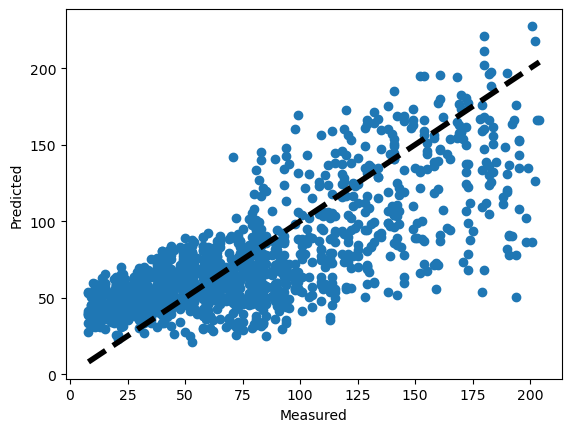

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() 
ax.scatter(y_test, y_pred) 
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', 
lw=4) 
ax.set_xlabel('Measured') 
ax.set_ylabel('Predicted') 
plt.show() 

In [38]:
# define the keras model 
model = Sequential() 
model.add(Dense(20, input_dim=10, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

C:\Users\lsant\Downloads\Newfolder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# compile the keras model 
model.compile(loss='binary_crossentropy', optimizer='adam', 
metrics=['accuracy']) 
# fit the keras model on the dataset 
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0000e+00 - loss: -3349.8857
Epoch 2/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -177504.8281
Epoch 3/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -1123955.1250
Epoch 4/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -3225963.0000
Epoch 5/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -6891552.0000
Epoch 6/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: -11942941.0000
Epoch 7/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -18651364.0000
Epoch 8/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -27376562.0000
Epoch 9/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -36739224.0000
Epoch 10/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -50171272.0000
Epoch 11/150
500/5

In [40]:
# evaluate the keras model 
_, accuracy = model.evaluate(X, y) 
print('Accuracy: %.2f' % (accuracy*100))

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -65204682752.0000
Accuracy: 0.00
